# Stoneburner, Kurt #
- ## DSC 550 - Week 06
- ## Milestone #1

In [33]:
#//*** Consider using Waterfall Charts to plot Expected vs actual values.
#//*** This may require bar charts and binning.

In [54]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

pd.set_option('display.width', 200)

In [35]:
# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   

Begin Milestone 1 with a 250-500-word narrative describing an original idea for an analysis/model building business problem. Then, do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Keep in mind that your analysis may look very different from the Titanic tutorial graphical analysis. Write a short overview/conclusion of the insights gained from your graphical analysis.

I'm interested in looking at the racial disparities of confirmed COVID-19 Cases in California. This is an extension of my DSC540 project which gathered California countywide COVID data along, Statewide racial COVID data and county wide dempgraphics. My initial goal is to model/estimate COVID cases at the county level.

What are the differences in racial COVID rates across California as a whole?

How do individual county COVID rates vary?

**two or three more questions go here**

I'm bringing data originally published by the State of California. Unfortunately, after submitting my original term project, California changed the format of it's data files. For this submission I'm working with data last updates on 2/27. I'm under a strict time constraint this week. I must finish by 4/22, due to a 3-day weekend honoring 14years of marriage. 

my most notable feature engineering was shifting all the data to cases per 100,000. This scaled the data so large counties are do not overly dominate the small ones.

In [57]:
bt_df = pd.read_pickle("z_bt_df.zip")
nbt_df = pd.read_pickle("z_ca_covid_by_race.zip")
state_race_df = pd.read_pickle("z_state_ethnic_totals.zip")

pop_attrib_df = pd.read_pickle("z_pop_attrib_df.zip")
print(bt_df)
print(nbt_df)

          race  cases  case_percent  deaths  death_percent  percent_ca_pop        date      county  cty_confirmed  cty_deaths  cty_newconfirm  cty_newdeath  state_confirmed  state_new_confirmed  \
0       Latino   5276         35.99     170          28.38            38.9  2020-04-13     Trinity            0.0         0.0               0             0            22348                  554   
1       Latino   5276         35.99     170          28.38            38.9  2020-04-13  Unassigned            2.0         0.0               0             0            22348                  554   
2       Latino   5276         35.99     170          28.38            38.9  2020-04-13      Solano          137.0         2.0               1             0            22348                  554   
3       Latino   5276         35.99     170          28.38            38.9  2020-04-13       Glenn            3.0         0.0               0             0            22348                  554   
4       Latino 

In [37]:
state_race_rolling_df = state_race_df.copy()

print(state_race_rolling_df)
print(state_race_rolling_df.rolling(3).mean())


           date  all_races     Latino  Multiracial     Black     Asian     White
0    2020-04-13   0.000000   0.000000     0.000000  0.000000  0.000000  0.000000
1    2020-04-14   2.506329   1.605063     0.088608  0.194937  0.362025  0.759494
2    2020-04-15   2.749367   1.324051     0.065823  0.174684  0.293671  0.759494
3    2020-04-16   4.450633   1.468354     0.083544  0.172152  0.506329  0.670886
4    2020-04-17   3.407595   1.554430     0.035443  0.172152  0.324051  0.640506
..          ...        ...        ...          ...       ...       ...       ...
316  2021-02-23   8.726582   7.683544     0.318987  0.696203  1.313924  3.000000
317  2021-02-24  13.425316  11.653165     0.825316  0.658228  1.445570  3.483544
318  2021-02-25  12.569620   5.997468     0.863291  0.825316  1.377215  4.410127
319  2021-02-26  13.670886  12.764557     0.179747  0.726582  1.331646  2.215190
320  2021-02-27  13.040506   8.027848     0.521519  0.605063  1.027848  2.893671

[321 rows x 7 columns]
    

In [49]:
print(nbt_df[ nbt_df["race"] == "Latino"])

              date    race    cases  deaths         county  cty_newconfirm  cty_newdeath  state_confirmed      pop  pop_race  pop_100k  race_100k  confirm_cty_100k  confirm_state_100k
0       2020-04-13  Latino     5276     170         Solano               1             0            22348   447643    122103         4          1                 0                5587
1       2020-04-13  Latino     5276     170         Sonoma               2             0            22348   494336    134954         4          1                 0                5587
2       2020-04-13  Latino     5276     170   Contra Costa              28             1            22348  1153526    300420        11          3                 2                2031
6       2020-04-13  Latino     5276     170  San Francisco              73             3            22348   881549    134309         8          1                 9                2793
9       2020-04-13  Latino     5276     170      San Mateo              15      

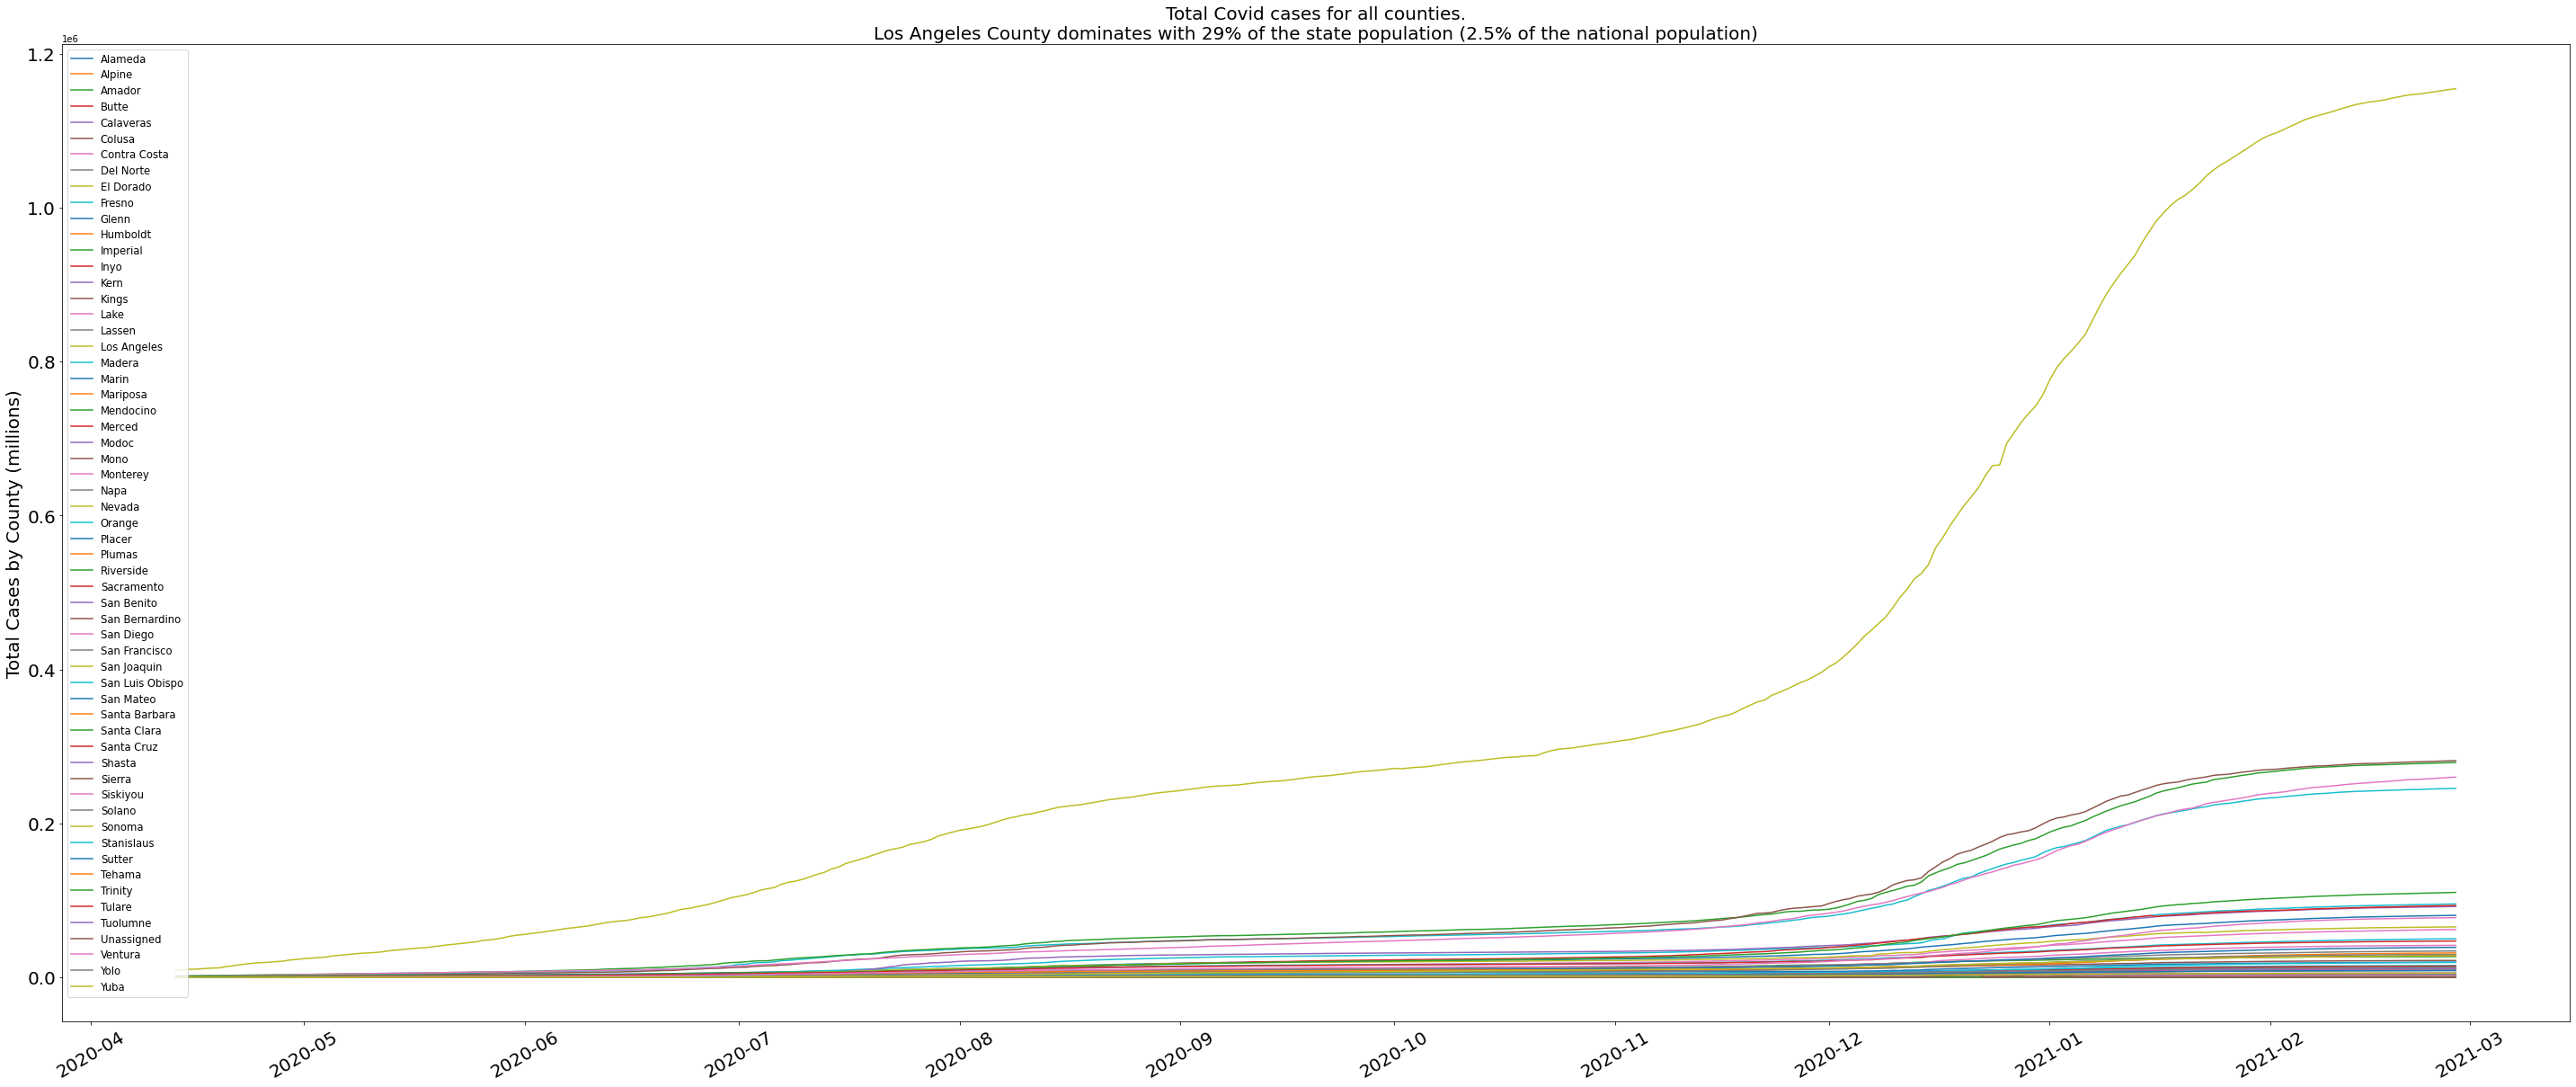

In [93]:
##########################################################################################
#//*** Quick illustration of why compareing counties in California is difficult
##########################################################################################

plt.rcParams['figure.figsize'] = [50,20]
plt.rcParams.update({'figure.max_open_warning': 0})



display_size = 20
fig,ax = plt.subplots()
for group in bt_df[ bt_df["race"] == "Latino"] .groupby("county"):
    loop_df = group[1]
    
    #print(loop_df["county"].iloc[0],loop_df['cases'])
   
    ax.plot(loop_df['date'],loop_df['cty_confirmed'], label=loop_df["county"].iloc[0])


        
plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"Total Covid cases for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


    
    
    

<ipython-input-99-04a4134361a5>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = nbt_df[ bt_df["race"] == "Latino"]


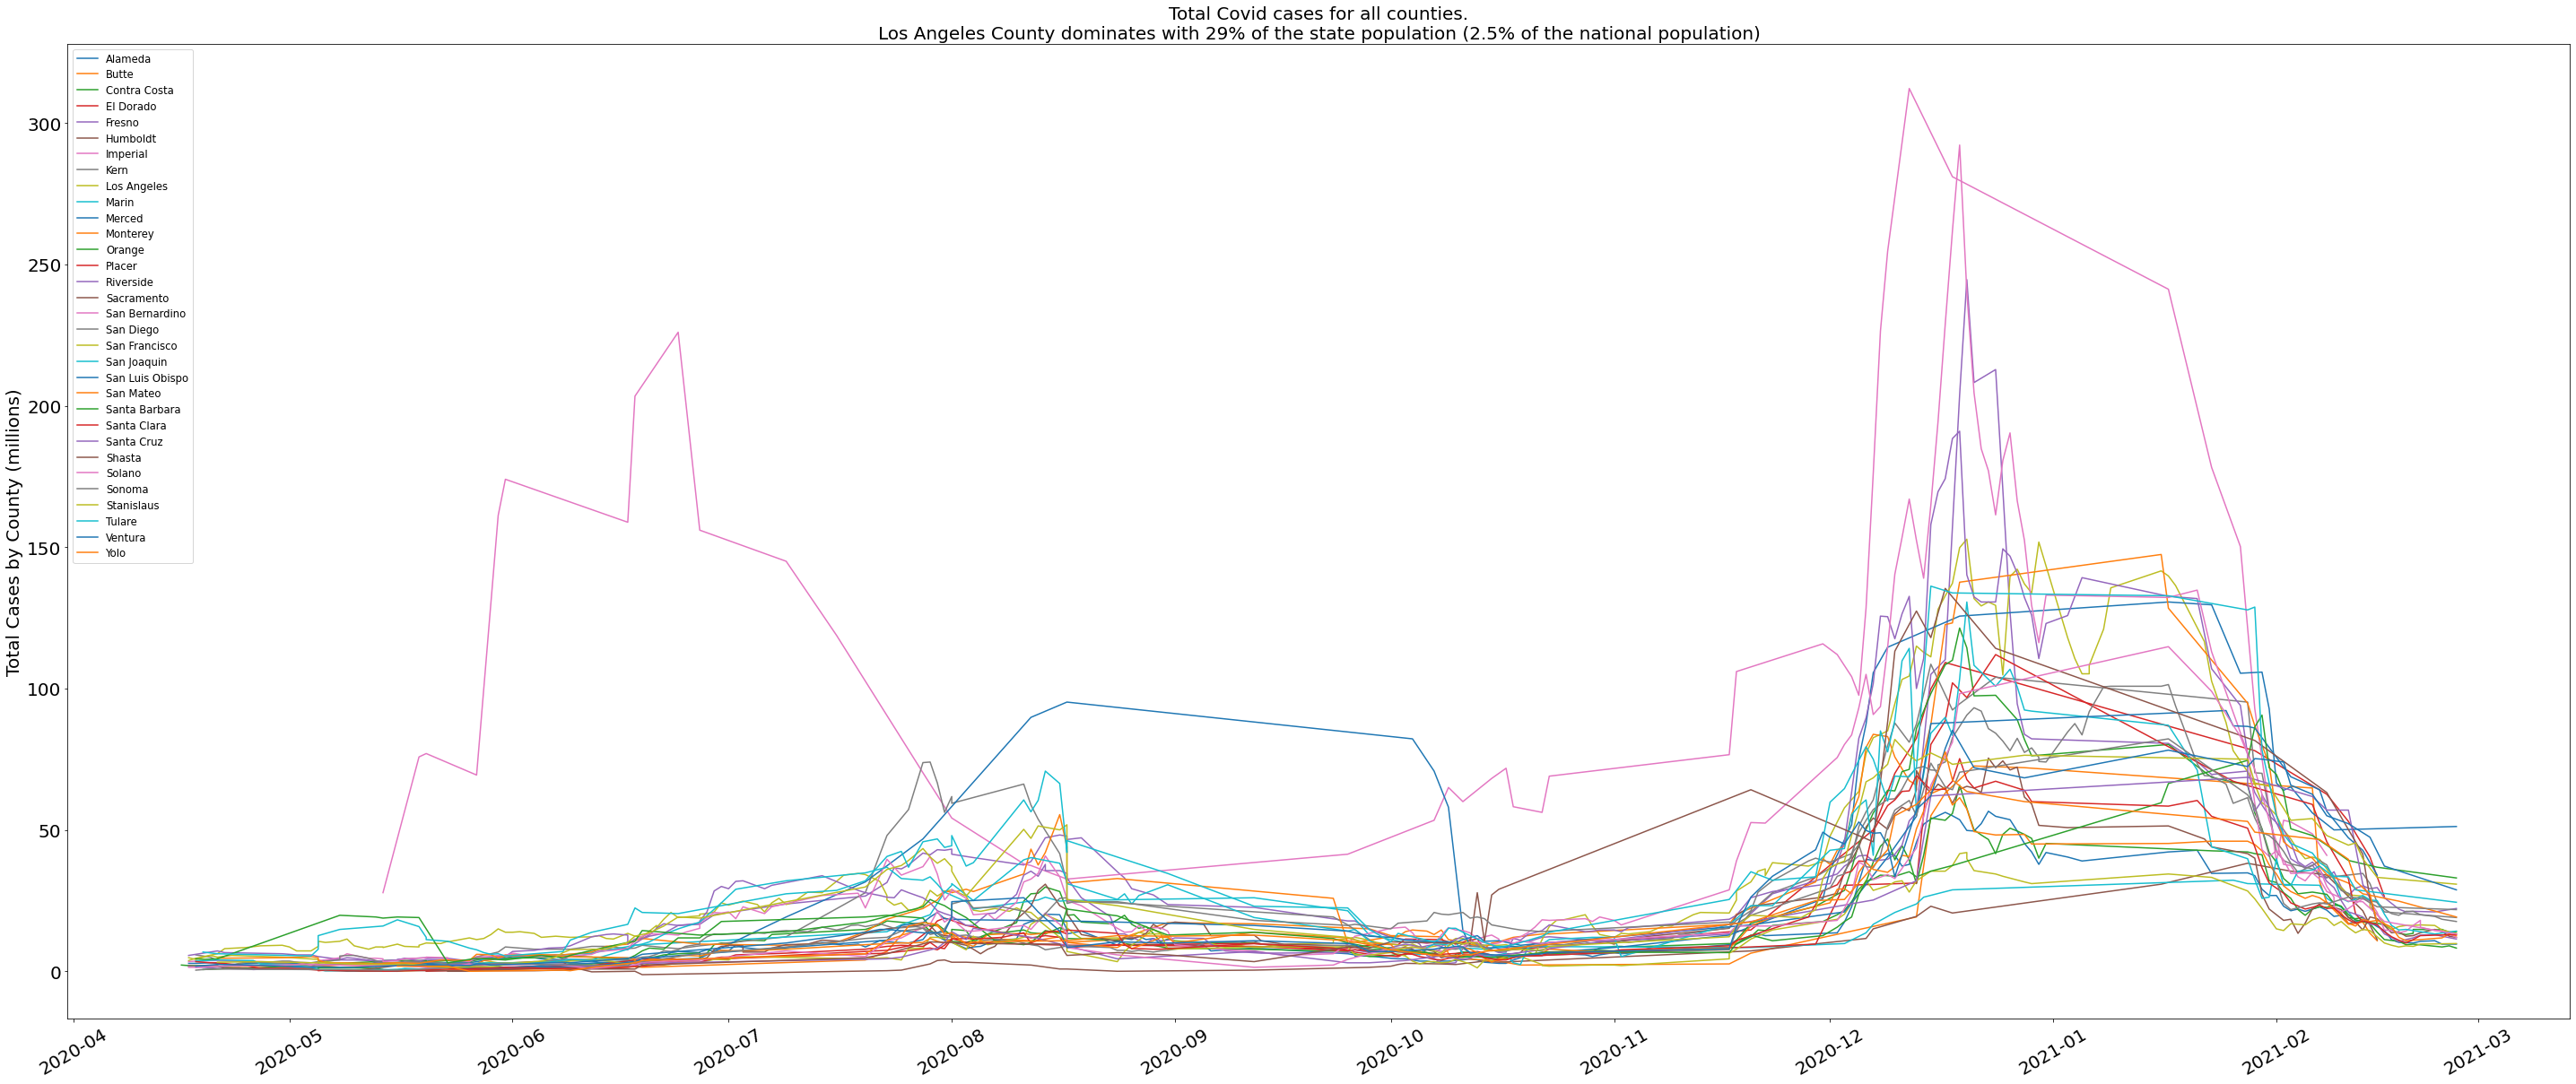

In [99]:
##########################################################################################
#//*** Quick illustration of why compareing counties in California is difficult
##########################################################################################

plt.rcParams['figure.figsize'] = [50,20]
plt.rcParams.update({'figure.max_open_warning': 0})

temp_df = nbt_df[ nbt_df["race"] == "Latino" ]

display_size = 20
fig,ax = plt.subplots()
for group in temp_df.groupby("county"):
    loop_df = group[1]
    
    #print(loop_df["county"].iloc[0],loop_df['cases'])
   
    ax.plot(loop_df['date'],loop_df['confirm_cty_100k'].rolling(5).mean(), label=loop_df["county"].iloc[0])


        
plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"Total Covid cases for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


    
    
    

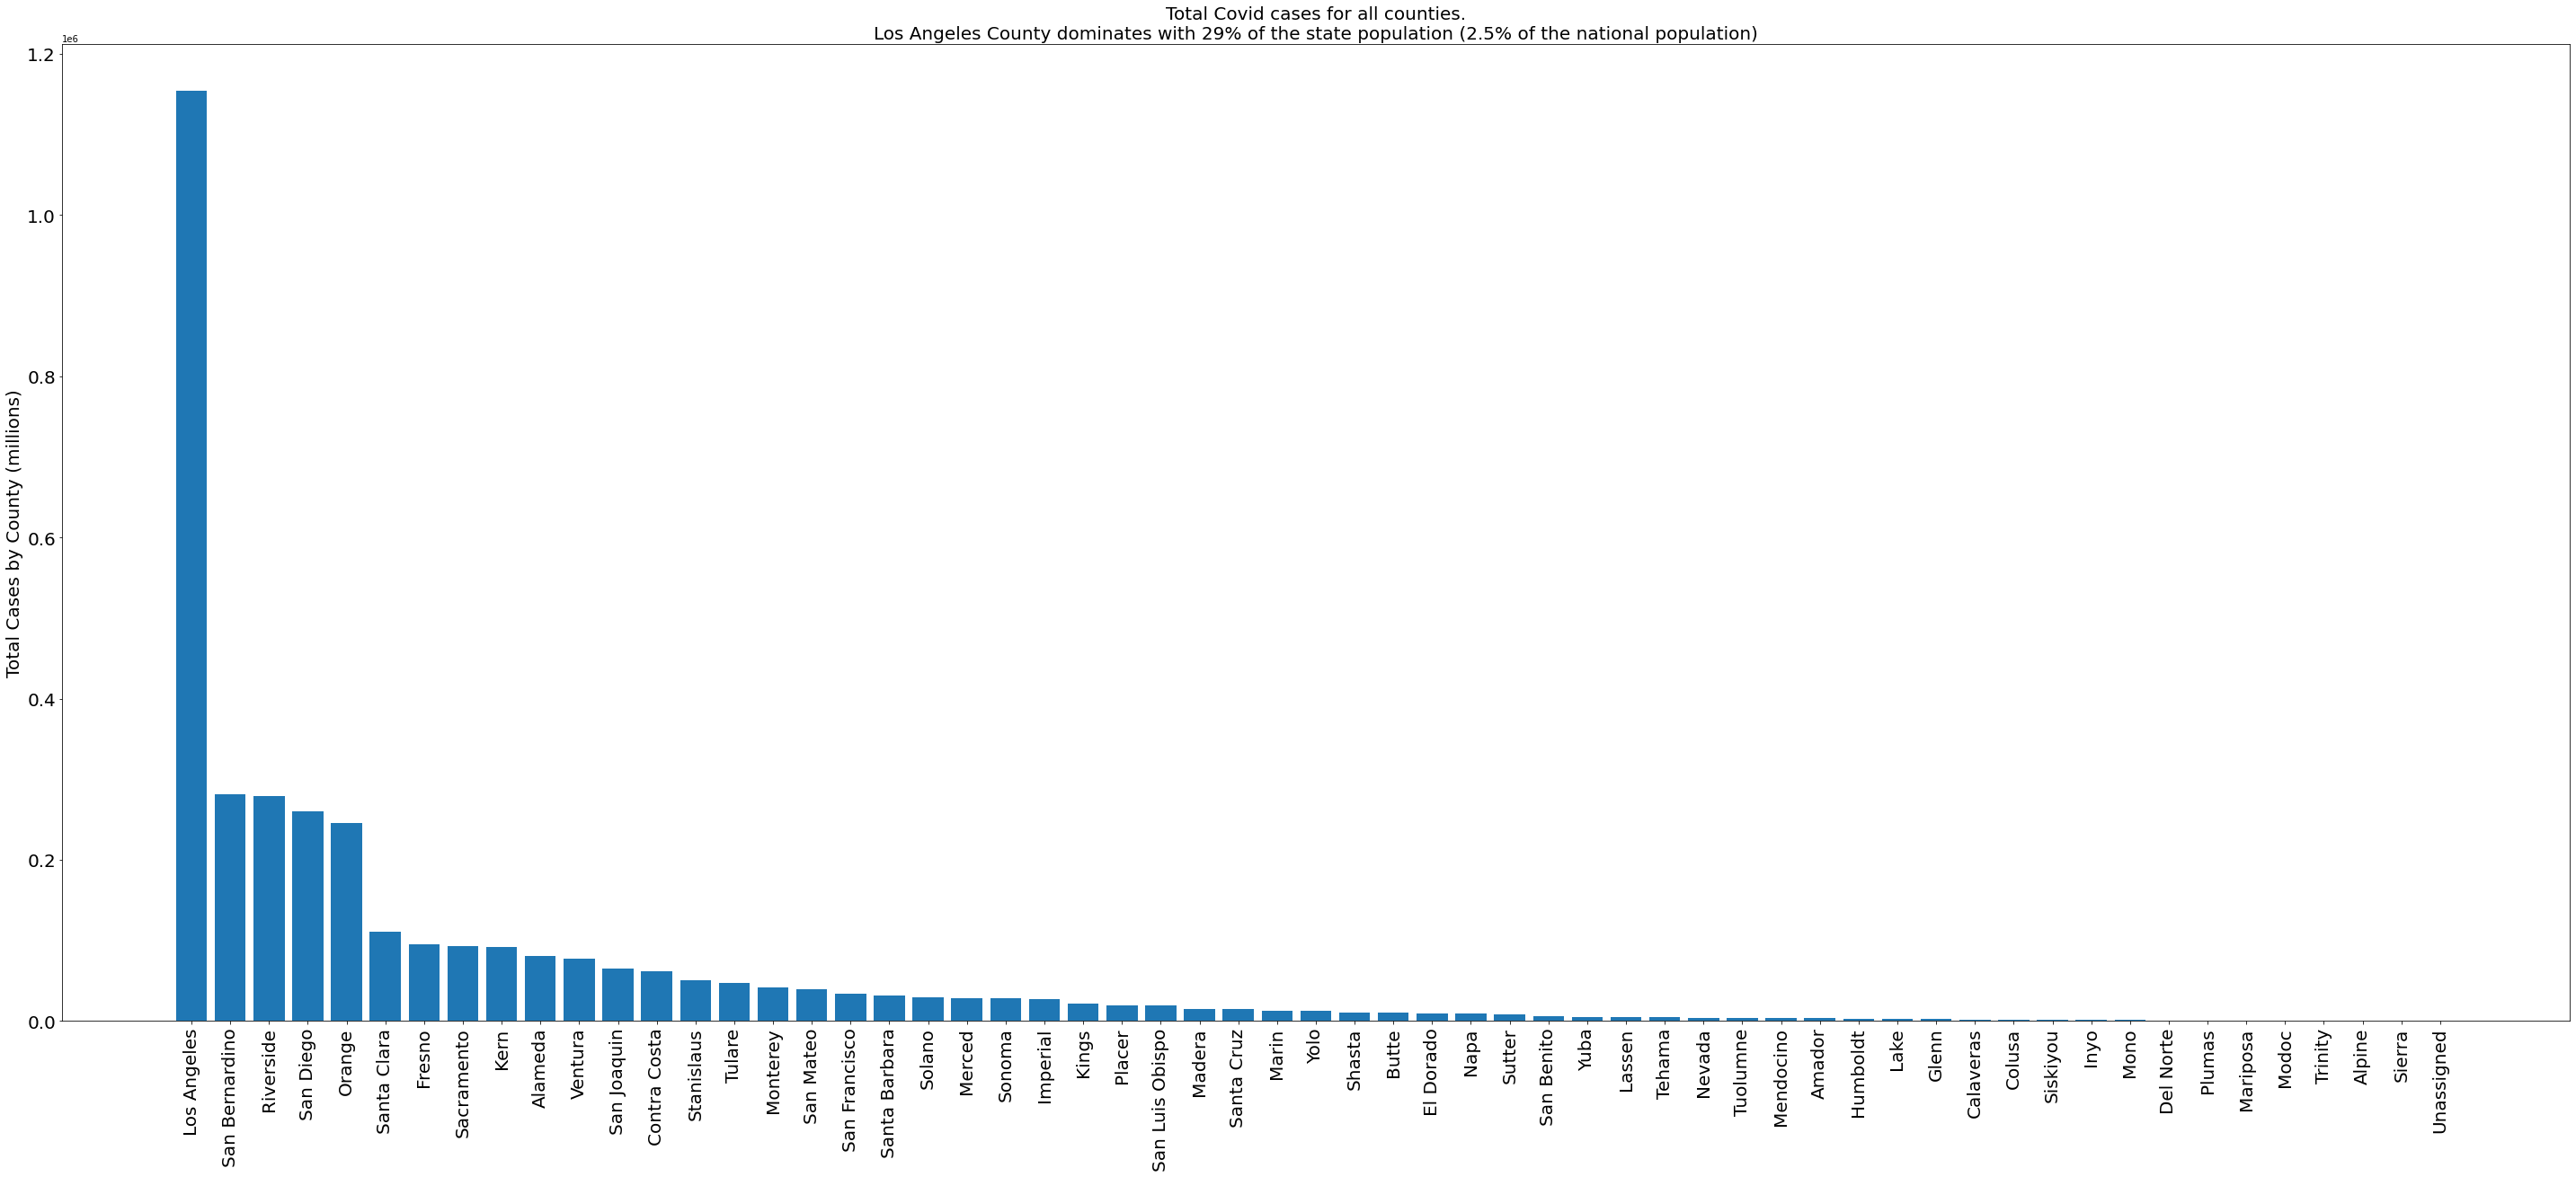

In [90]:
#//*** Snapshot the last day with raw numbers
#//*** Compare raw county values on the last day of the data set

#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]


last_day_df = bt_df[  bt_df['race'] == "Latino"]

last_day_df =  last_day_df[last_day_df['date'] == last_date ].sort_values("cty_confirmed",ascending=False)

display_size = 20
fig,ax = plt.subplots()

ax.bar(last_day_df['county'],last_day_df['cty_confirmed'])


        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
#plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"Total Covid cases for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


#last_day_df = rd[race_list[0]][rd[race_list[0]]['date'] == last_date]

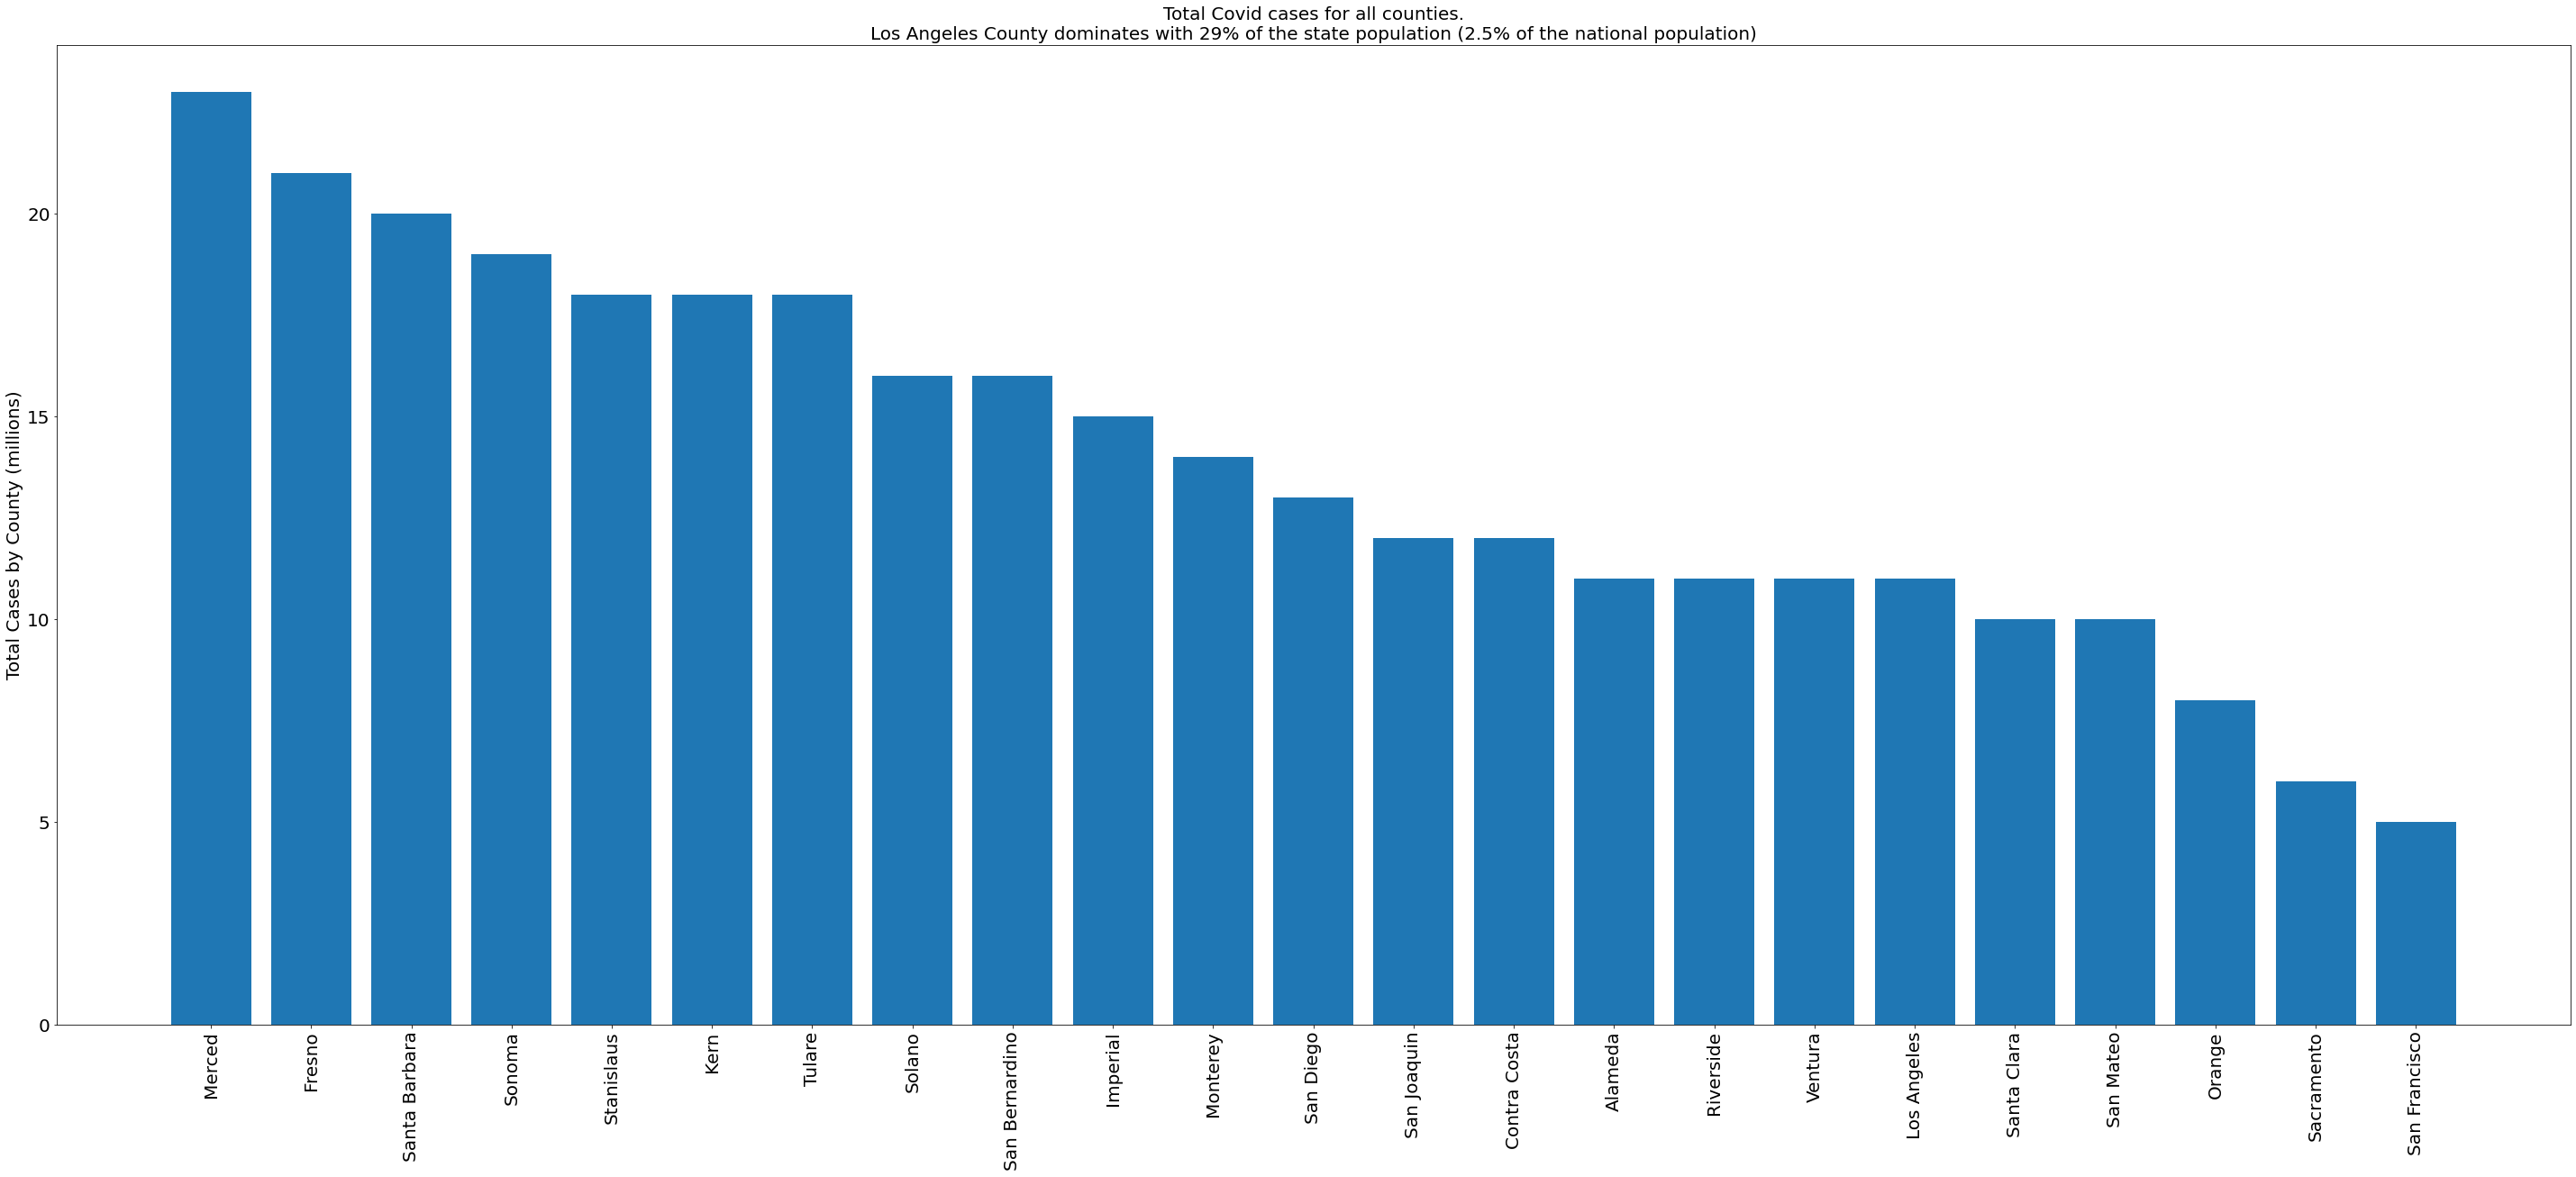

In [103]:
#//*** Snapshot the last day with raw numbers
#//*** Compare raw county values on the last day of the data set

#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]


last_day_df = nbt_df[  nbt_df['race'] == "Latino" ]

last_day_df =  last_day_df[last_day_df['date'] == last_date ].sort_values("confirm_cty_100k",ascending=False)

display_size = 20
fig,ax = plt.subplots()

ax.bar(last_day_df['county'],last_day_df['confirm_cty_100k'])


        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
#plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"Total Covid cases for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


#last_day_df = rd[race_list[0]][rd[race_list[0]]['date'] == last_date]